In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Reading the raw dataset.

In [2]:
df = pd.read_csv(
    open("../raw/media_political_stance.tsv"),
    sep="\t",
    header=None,
    names=["topic10", "topic15", "stance", "oscarID", "url", "text"],
    encoding="utf-8"
)
df

,topic10,topic15,stance,oscarID,url,text
0,10:6,15:5,left,<urn:uuid:00003ff6-6bdc-4e5f-95b6-b9cdf5a079f4>,http://www.cnn.com/2008/CRIME/05/06/sect.leade...,(CNN) -- The leader of an apocalyptic New Mexi...
1,10:0,15:9,left,<urn:uuid:00005e8e-6eac-46e3-80fa-f18379086266>,https://www.washingtonpost.com/realestate/2016...,The 308 condos at the planned 56-story Residen...
2,10:3,15:7,left,<urn:uuid:0000f5be-2015-4cb2-bb80-2d3544948e8a>,https://abcnews.go.com/blogs/politics/2011/12/...,House Speaker John Boehner says he will move a...
3,10:7,15:7,left,<urn:uuid:00012084-7e5e-4993-a723-4547c195f291>,https://www.cbsnews.com/news/poll-many-veteran...,"More than half of 1,268 military veterans poll..."
4,10:5,15:2,left,<urn:uuid:00012e14-8c37-44f4-8179-2c8b24999acc>,https://www.usatoday.com/story/news/2017/07/27...,"Since Election Day, President Trump’s business..."
...,...,...,...,...,...,...
513797,10:2,15:11,right,<urn:uuid:fffcd1ac-a04d-4a6c-b86f-53257e6c6906>,https://www.breitbart.com/national-security/20...,President Donald Trump announced Sunday mornin...
513798,10:6,15:8,right,<urn:uuid:fffd7925-53b1-4d0b-99c1-c51422646fa3>,https://www.wnd.com/2008/06/67678/,WASHINGTON – Polygamy and child brides may mak...
513799,10:5,15:13,right,<urn:uuid:fffe046c-8448-4e32-aa29-f3db718669b4>,https://www.wnd.com/2008/05/65641/,A Catholic school has been given court permiss...
513800,10:6,15:8,right,<urn:uuid:fffe95b1-e48d-4fc3-8fcf-4052917cb996>,https://www.thegatewaypundit.com/2021/10/watch...,WATCH: HOT MIC: Parents Call For Resignation A...


Dropping useless columns.

In [3]:
df = df.drop(columns=["topic10", "topic15", "oscarID", "url"])

Renaming columns.

In [4]:
df = df.rename(columns={"text": "body", "stance": "leaning"})

Dropping rows with missing data.

In [5]:
df = df.dropna()

Categorizing the leaning column.

In [6]:
df["leaning"].unique()

array(['left', 'right'], dtype=object)

In [7]:
df["leaning"] = df["leaning"].astype("category")

Printing duplicates.

In [8]:
df[df["body"].duplicated(keep=False)]

,leaning,body
9,left,The Intercept pursues the stories others don’t...
24,left,All the latest on dysfunction in Donald Trump'...
42,left,........NY Post's Kyle Smith on VP Kamala Harr...
62,left,Two top Senate leaders declared Tuesday that t...
64,left,(CNN) Cutting taxes for the rich helps the poo...
...,...,...
513699,right,Supreme Court <NS> Published October 15 <NS> ...
513705,right,The Washington Free Beacon's morning email lay...
513707,right,GOP staffer Elizabeth Lauten got fired for pok...
513709,right,"One week ago, May 28, 2011, RT correspondent a..."


Dropping the duplicates.

In [9]:
df = df.drop_duplicates(subset="body")

Removing the new paragraph token from the bodies.

In [10]:
df["body"] = df["body"].str.replace(" <NS>", "")

Inspecting body length.

In [11]:
df["body_length"] = df["body"].str.len()
df["body_word_count"] = df["body"].str.split().str.len()
df = df.sort_values(by="body_length")
df.head()

,leaning,body,body_length,body_word_count
348489,right,WND Staff Recent Posts WND news editors compil...,72,12
158910,left,Covid vaccines: India is one of the world's to...,98,20
118001,left,New Delhi air pollution has hit record levels ...,98,20
7582,left,Robert De Niro has some choice words for his F...,98,19
49370,left,Huawei is building 5G in Russia and China. Thi...,98,20


In [12]:
df["body_length"].mean()

np.float64(4212.2793842924175)

The leaning distribution.

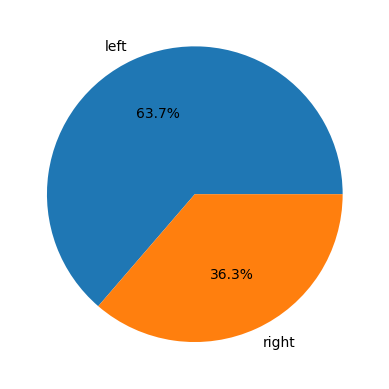

In [13]:
df.groupby("leaning", observed=True).size().plot.pie(autopct="%1.1f%%");

The distribution of body length sums per leaning.

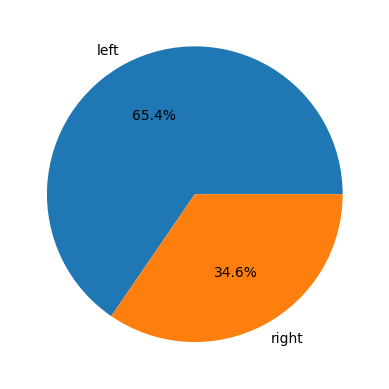

In [14]:
df.groupby("leaning", observed=True)["body_length"].sum().plot.pie(autopct="%1.1f%%", ylabel="");

Body length distribution by leaning.

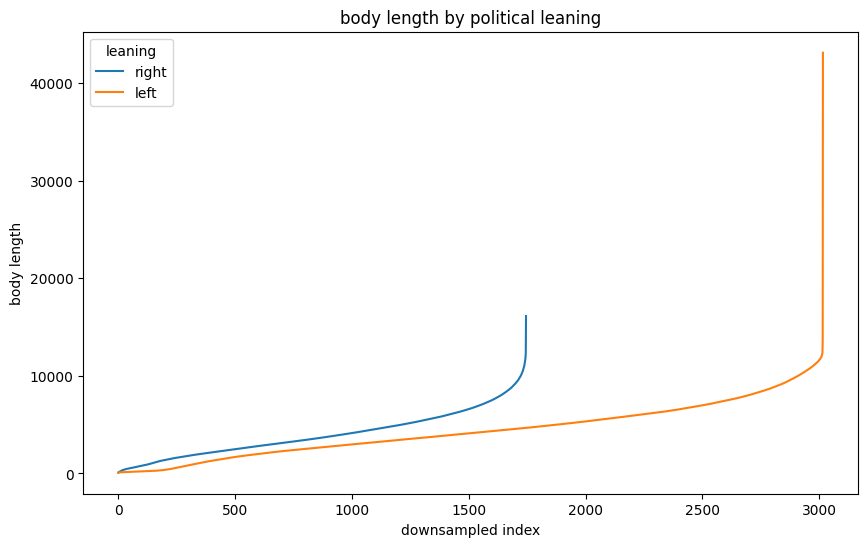

In [15]:
plt.figure(figsize=(10, 6))

for leaning in df["leaning"].unique():
    df_leaning = df[df["leaning"] == leaning]
    downsampled = pd.concat(
        # Ensuring to include the last (longest) item.
        [df_leaning["body_length"].iloc[::100], df_leaning["body_length"].tail(1)]
    ).drop_duplicates().reset_index(drop=True)
    plt.plot(downsampled, label=leaning)

plt.xlabel("downsampled index")
plt.ylabel("body length")
plt.title("body length by political leaning")
plt.legend(title="leaning")
plt.show()

In [16]:
df.to_parquet("../preprocessed/media_political_stance.parquet")